In [4]:
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


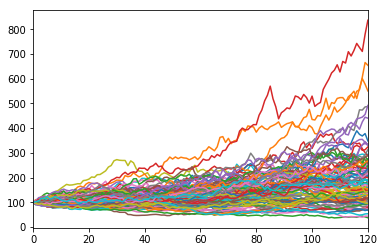

In [5]:
rk.gbm(10, 100).plot(legend=False)
plt.show()

In [8]:
def show_gbm(n_scenarios, mu, sigma):
    """Draw the results of a stock price evolution
    undet Geometric Brownian Motion mode"""
    
    s_0 = 100
    prices = rk.gbm(n_scenarios=n_scenarios,
                   mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', 
                    alpha=0.5, linewidth=2, figsize=(12, 5))
    ax.axhline(y=100, ls=':', color='black')
    #draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)